# 머신러닝 스니펫 목차

#### 데이터 헨들링
1. 모듈 임포트
2. 데이터 탐색 (이해, 도메인 지식 학습)
3. 데이터 분석 (단변량, 이변량, ydata-profiling)
4. 데이터 전처리 (결측치, 이상치, 정규화, 처리, 피처엔지니어링)
6. 학습, 평가 데이터 분리(x_train, x_test, y_train, y_test)
---
#### 모델링 (알고리즘 선택)
1. 모듈 임포트
2. 모델 선언
3. 모델 학습
4. 모델 예측 및 평가
5. 시각화
---
#### 하이퍼파라미터 튜닝
1. cross_val_score
2. GridSearchCV
3. RandomSearchCV
---
#### Regulation 테스트

# 모듈 불러오기

#### 기본

In [2]:
import numpy as np
import pandas as pd
import joblib

from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr

In [ ]:
# pip install xgboost
# pip install lightgbm

#### 회귀

In [ ]:
from sklearn.linear_model import LinearRegression as RL
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from lightgbm import LGBMRegressor as LGBMR
from xgboost import XGBRegressor as XGBR

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### 분류

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from lightgbm import LGBMClassifier as LGBMC
from xgboost import XGBClassifier as XGBC

from sklearn.metrics import confusion_matrix as cmatrix
from sklearn.metrics import classification_report as creport
from sklearn.metrics import recall_score as recall
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score

#### 교차검증

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import (
    StratifiedKFold, # 분류
    KFold, # 회귀
    # GroupKFold, 
    # RepeatedKFold, 
    # StratifiedGroupKFold, 
    # RepeatedStratifiedKFold
)

#### 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 데이터 저장

In [ ]:
folder_name = '1th'

x_train.to_csv(f'./{folder_name}/x_train.csv', index = False)
y_train.to_csv(f'./{folder_name}/y_train.csv', index = False)
x_test.to_csv(f'./{folder_name}/x_test.csv', index = False)
y_test.to_csv(f'./{folder_name}/y_test.csv', index = False)
y_test.to_csv(f'./{folder_name}/x_final.csv', index = False)

# 데이터 로드

In [ ]:
folder_name = '1th'

df = pd.read_csv(f'./{folder_name}/x_train.csv', sep=',', encoding='utf-8')

# 데이터 탐색

#### x, y 분리

In [ ]:
target='타겟컬럼'

x = df.drop(target, axis=1)
y = df.loc[:, target]

#### 학습 평가 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

# stratify 는 y 데이터가 알맞은 비율로 분할되게 맞춰준다.
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

#### 누락된 값 분석

In [ ]:
df.isna().sum() # 결측값 컬럼별 개수 파악

In [ ]:
df.isna().mean() * 100 # 결측값 비율 파악

In [ ]:
# !pip install missingno

In [ ]:
import missingno as msno

# 컬럼별 결측치 위치 시각화
ax = msno.matrix(df)
plt.show()

# 파일 저장
# from time import time, localtime
# today = localtime(time())
# ax.get_figure().savefig(f'images/mlpr_{today.tm_mon}{today.tm_mday}.png')

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
(1 - df.isna().mean()).abs().plot.bar(ax=ax)

# 파일 저장
# from time import time, localtime
# today = localtime(time())
# fig.savefig(f'images/mlpr_{today.tm_mon}{today.tm_mday}.png', dpi=300)

#### 누락된 값 대치

In [5]:
from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

In [ ]:
target = '컬럼명'
imputer = impute.IterativeImputer(
                                    missing_values = np.nan,    # 찾을 값 (결측값)
                                    initial_strategy = 'mean',  # 대치할 방법, 'most_frequent'
                                    verbose = 0
                                    )
imputed = imputer.fit_transform(x_train[target])
x_train.loc[:, target] = imputed
imputed = imputer.fit_transform(x_test[target])
x_test.loc[:, target] = imputed

In [ ]:
drop_cols = ['컬럼명1', '컬럼명2']
df = df.drop(columns=drop_cols, inplace=True)
df = df.dropna()
df = df.dropna(axis=1)

#### 누락된 값이 있었다는 신호를 주는 컬럼 생성

In [ ]:
def add_missing_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)
    return wrapper

In [ ]:
df = df.assign(컬럼명_missing=add_missing_indicator('컬럼명'))

#### 열 이름 수정

In [ ]:
# 스네이크 케이스로 컬럼명 정리 (그러나 앞뒤 공백은 처리 못해줌)
import janitor as jn
jn.clean_names(df) 

In [ ]:
# 컬럼명의 앞뒤 공백 제거 및 스네이크 케이스로 정리
def clean_col(name):
    return name.strip().lower().replace(' ', '_')

df.rename(columns=clean_col)

#### skew 높은 값 로그 스케일링

In [ ]:

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = df.dtypes[df.dtypes != 'object'].index
# df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = df[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

In [ ]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

#### 이상치 제거 IQR

In [ ]:
# np.percentile(df[col].values, 100)
# np.max(df[col].values)

def get_outlier(df, col, weight=1.5):
    tmp = df[col]
    quantile_25 = np.percentile(tmp.values, 25)
    quantile_75 = np.percentile(tmp.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    
    low_outlier = quantile_25 - iqr_weight
    high_outlier = quantile_75 + iqr_weight
    
    low_outlier_index = tmp[tmp < low_outlier].index
    high_outlier_index = tmp[tmp > high_outlier].index

    return [low_outlier_index, high_outlier_index]

# 데이터 분석

#### 수작업으로 분석

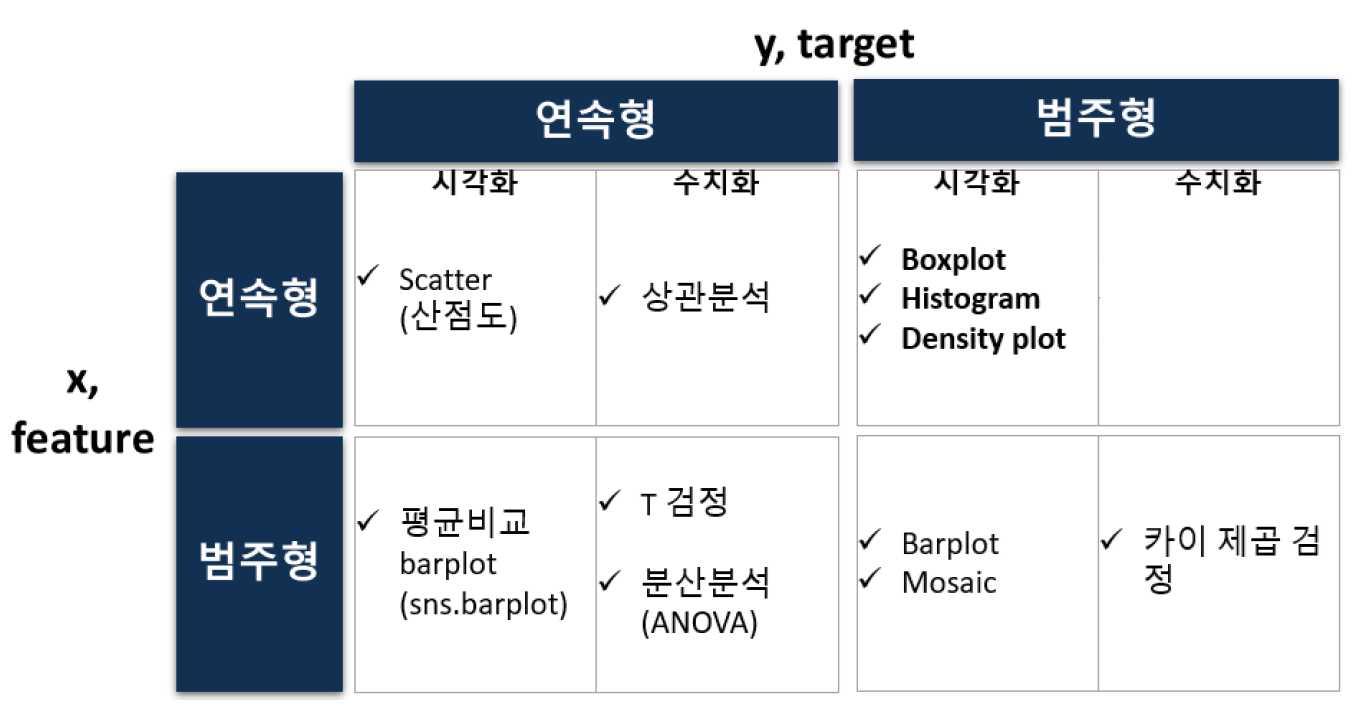

In [ ]:
def col_info(df, col):
    display(df[[col]].info())
    display(df[[col]].describe().T)
    
    plt.figure(figsize=(16, 16))
    plt.title(col)
    plt.grid(axis='x')    
    
    plt.subplot(3,1,1)
    sns.boxplot(x=col, data=df)
    
    plt.subplot(3,1,2)
    sns.histplot(x=col, data=df, kde=True)

    plt.tight_layout()
    plt.show()
    
    # 왜도 > 0 : 왼쪽 치우침 / 왜도 < 0 : 오른쪽 치우침
    # 첨도 = 0 : 정규분포 / 첨도 > 0 : 위로 뾰족 / 첨도 < 0 : 아래로 뾰족
    print(f'왜도: {skew(df[col])} 첨도: {kurtosis(df[col])}')
    print('-' * 80)

def numerical_analysis(df, x, y):
    plt.title('숫자형 -> 숫자형 이변량 분석')
    plt.grid(axis="x")
    
    sns.regplot(x = x, y = y, data = df)
    sns.jointplot(x = x, y = y, data = df)
    plt.show()    

    result = pearsonr(x = df[x], y = df[y])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    print('-' * 50)

def categorical_analysis(df, x, y):
    plt.title('범주형 -> 숫자형 이변량 분석')
    plt.grid(axis="x")
    
    sns.barplot(x = x, y = y, data = df)
    plt.axhline(df[y].mean(), color = 'r')
    plt.show()    
    
    data_group = []
    cnt = 0
    
    for val in df[x].unique():
        data_group.append(df.loc[df[x]==val, y])
        cnt += 1

    if cnt == 2:
        result = ttest_ind(*data_group)
        print(f't-value : {result[0]}, p-value : {result[1]}')
        print('-' * 80)
    else:
        result = f_oneway(*data_group)
        print(f'f-value : {result[0]}, p-value : {result[1]}')
        print('-' * 80)

def print_relation_xy(df, numerical_cols, categorical_cols, y):
    for x in categorical_cols:
        data_group = []
        cnt = 0
        
        for val in df[x].unique():
            data_group.append(df.loc[df[x]==val, y])
            cnt += 1
        
        if x == y: # target y는 출력 제외
            continue
        
        if cnt == 2:
            result = ttest_ind(*data_group)
            print(f'{x} t-value : {result[0]}, p-value : {result[1]}')
        else:
            result = f_oneway(*data_group)
            print(f'{x} f-value : {result[0]}, p-value : {result[1]}')

    print('-' * 80)
    
    for x in numerical_cols:
        result = pearsonr(x = df[x], y = df[y])
        print(f'{x} 상관계수 : {result[0]}, p-value : {result[1]}')

def show_corr(df):
    plt.figure(figsize=(15,12))
    sns.heatmap(df.corr(), annot=True, cmap='RdYlGn_r')
    plt.xticks(rotation=45)
    plt.show()

#### 간단한 단변량 이변량 분석

In [ ]:
# !pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = df.profile_report(interactions={'targets':['labels'],}, explorative=True)
profile.to_widgets()

# 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
# min-max scaling
max_n, min_n = x_train.max(), x_train.min()

In [ ]:
x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)

# 회귀 모델링

In [ ]:
models =    {
                'RL': RL(n_jobs=-1),
                'KNNR': KNNR(n_neighbors=5),
                'DTR': DTR(max_depth=5, random_state=1),
                'SVR': SVR(kernel='rbf', C=1, random_state=1),
                'RFR': RFR(max_depth=5, random_state=1),
                'LGBMR': LGBMR(max_depth=5, num_leaves=31, learning_rate=0.1),
            }

results = {}
r2_scores = {}

for key in models:
    model = models[key]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse_result = mse(y_test, y_pred)
    r2_result = r2_score(y_test, y_pred)
    r2_scores[key] = r2_result
    
    print('=' * 20, key, '=' * 20)
    print('mse : ', mse_result)
    print('r2_score : ', r2_result)
    print('=' * 60)
    
    results[key] = model

In [ ]:
for key in results:
    results[key]
    plt.figure(figsize=(16, 6))
    plt.barh(y=list(x_train), width=results[key].feature_importances_)
    plt.show()

In [ ]:
# 시각화
plt.figure(figsize=(16, 6))
plt.barh(y=list(r2_scores), width=r2_scores.values())
plt.xlabel('R2_Score')
plt.ylabel('Model')
plt.show()

# 분류 모델링

In [ ]:
models = {
        'LR': LR(C=1, random_state=1, n_jobs=-1),
        'KNN': KNNC(n_neighbors=5),
        'DTC': DTC(max_depth=5, random_state=1),
        'SVC': SVC(kernel='rbf', C=1, random_state=1),
        'RFC': RFC(max_depth=5, random_state=1),
        'LGBMC': LGBMC(max_depth=5, num_leaves=31, learning_rate=0.1),
        }

results = {}
acc_results = {}
recall_results = {}

for key in models:
    model = models[key]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print('=' * 20, key, '=' * 20)
    print('confusion_matrix\n', cmatrix(y_test, y_pred))
    print('classification_report\n', creport(y_test, y_pred))
    print('=' * 60)
    
    results[key] = model
    acc_results[key] = acc(y_test, y_pred)
    recall_results[key] = recall(y_test, y_pred)

#### 모델별 정확도 시각화

In [ ]:
tmp = pd.Series(acc_results)

plt.figure(figsize=(16, 6))
plt.title('accuracy')
plt.barh(tmp.index, tmp.values)
plt.show()

#### 모델별 재현율 시각화

In [ ]:
tmp = pd.Series(recall_results)

plt.figure(figsize=(16, 6))
plt.title('recall')
plt.barh(tmp.index, tmp.values)
plt.show()

#### 모델별 학습성능, 평가성능 출력

In [ ]:
print('모델 : 학습성능 / 평가성능 (Accuracy)')
for key in results:
    print(f'{key:10} : {round(results[key].score(x_train, y_train), 4):6} / {round(results[key].score(x_test, y_test), 4):6}\n')

#### 변수 중요도 시각화

In [ ]:
key = 'LGBMC'
tmp = pd.Series(data=results[key].feature_importances_, index=list(x_train)).sort_values()

plt.figure(figsize=(16, 6))
plt.barh(y=tmp.index, width=tmp.values)
plt.show()

#### 혼동행렬 시각화

In [ ]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

In [ ]:
confusion = cmatrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

# LightGBM 세팅

In [ ]:
from lightgbm import LGBMClassifier as LGBMC

model = LGBMC(n_estimators=400)

evals = [(x_test, y_test)]
model.fit(  
            x_train, 
            y_train,
            learning_rate=0.1,
            early_stopping_rounds=100, 
            eval_metric="logloss", 
            eval_set=evals, 
            verbose=True
         )
preds = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:, 1]

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# Regulation 세팅

In [ ]:
# 모델링(ElasticNetCV)
from sklearn.linear_model import ElasticNetCV

l1 = np.linspace(0.1, 1, 10)                         
alpha = np.linspace(0.1, 10, 50)
model = ElasticNetCV(l1_ratio=l1, alphas=alpha, cv=5, random_state=1)
model.fit(x_train, y_train)

# 성능 확인
print('학습성능:', model.score(x_train, y_train))
print('평가성능:', model.score(x_test, y_test))
print('-' * 28)
print('l1_ratio:', model.l1_ratio_)
print('alpha:', model.alpha_)

In [ ]:
# 가중치 시각화 
plt.figure(figsize=(15, 5))
plt.bar(x=range(1, 501), height=model.coef_)
plt.show()

# 하이퍼파라미터 튜닝

#### K-fold

In [ ]:
models = {
        'LR': LR(C=1, random_state=1, n_jobs=-1),
        'KNN': KNNC(n_neighbors=5),
        'DT': DTC(max_depth=5, random_state=1),
        'SVC': SVC(kernel='rbf', C=1, random_state=1),
        'RFC': RFC(max_depth=5, random_state=1),
        'LGBMC': LGBMC(max_depth=5, num_leaves=31, learning_rate=0.1),
        }

results = {}

for key in models:
    model = models[key]
    # cross_val_score()은 내부적으로 StratifiedKFold 사용
    cv_score = cross_val_score(model, x_train, y_train, cv=5) 

    print('=' * 20, key, '=' * 20)
    print(cv_score)
    print('평균:', cv_score.mean())
    print('표준편차:', cv_score.std())
    print('=' * 60)
    
    results[key] = cv_score.mean()

# 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(results), width=results.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

#### GridSearchCV

In [ ]:
model = LGBMC(num_leaves=31, learning_rate=0.1) 

In [ ]:
params = {'max_depth': range(5, 20)}
model = GridSearchCV(
                    model,                  # 기본 모델 이름
                    params,                 # 앞에서 선언한 튜닝용 파라미터 변수
                    cv=StratifiedKFold(n_splits=3, random_state=1), # default=5
                    refit=True,             # 기본값 True
                    scoring=make_scorer(f1_score, average='micro'),   # 평가 방법
                    n_jobs=-1               # cpu 전부 사용
                    )     

In [ ]:
model.fit(x_train, y_train)

In [ ]:
model.cv_results_['mean_test_score']

In [ ]:
model.best_params_, model.best_score_

In [ ]:
tmp = pd.Series(data=model.best_estimator_.feature_importances_, index=list(x_train)).sort_values()

plt.figure(figsize=(16, 6))
plt.barh(y=tmp.index, width=tmp.values)
plt.show()

In [ ]:
# 예측하기
y_pred = model.predict(x_test)

In [ ]:
# 평가하기
print(cmatrix(y_test, y_pred))
print(creport(y_test, y_pred))

#### RandomSearchCV

In [ ]:
model = LGBMC(num_leaves=31, learning_rate=0.1)

In [ ]:
params = {'max_depth': range(5, 20)}
model = RandomizedSearchCV(
                            model,                  # 기본 모델 이름
                            params,                 # 앞에서 선언한 튜닝용 파라미터 변수
                            cv=5,                   # k-fold Cross Validation(default=5)
                            n_iter=20,              # Random하게 시도할 횟수(default=10)
                            refit=True,             # 기본값 True
                            scoring=make_scorer(f1_score, average='micro'),     # 평가 방법
                            n_jobs=-1               # cpu 전부 사용
                            )     

In [ ]:
model.fit(x_train, y_train)

In [ ]:
model.cv_results_['mean_test_score']

In [ ]:
model.best_params_, model.best_score_

In [ ]:
tmp = pd.Series(data=model.best_estimator_.feature_importances_, index=list(x_train)).sort_values()

plt.figure(figsize=(16, 6))
plt.barh(y=tmp.index, width=tmp.values)
plt.show()

In [ ]:
# 예측하기
y_pred = model.predict(x_test)

In [ ]:
# 평가하기
print(cmatrix(y_test, y_pred))
print(creport(y_test, y_pred))

# 시각화 

In [ ]:
for key in results:
    plt.figure(figsize=(5, 5))
    plt.title(key)
    plt.barh(list(x_train), model.feature_importances_)
    plt.show()

# 모델 저장 및 불러오기

In [ ]:
joblib.dump(model, 'modelname.pkl')

loaded_model = joblib.load('modelname.pkl')
score = loaded_model.score(x_test,y_test)

print('정확도: {score:.3f}'.format(score=score))

# Kaggle 제출

In [ ]:
sub = pd.DataFrame()
sub['label'] = pd.DataFrame(y_pred)
sub.tail(2)

In [ ]:
sub.set_index('id', inplace=True)
sub['label'].replace({1:'malicious', 0:'benign'}, inplace=True) # 분류 답안 생성
sub.tail(2)

In [ ]:
sub.to_csv('sample.csv', index=True) # 제출할 csv 파일 저장